In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m')

In [3]:
ice_cream_heater_df = pd.read_csv('icecream_vs_heater.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [4]:
ice_cream_heater_df = ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))
ice_cream_heater_df.head()

,heater,icecream
Month,,
2004-01-01,27,13
2004-02-01,18,15
2004-03-01,14,16
2004-04-01,13,19
2004-05-01,13,21


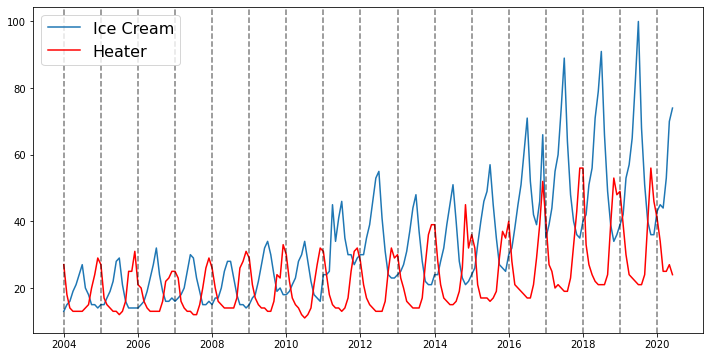

In [5]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['icecream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

In [6]:
avgs = ice_cream_heater_df.mean()
devs = ice_cream_heater_df.std()

In [7]:
for col in ice_cream_heater_df.columns:
    ice_cream_heater_df[col] = (ice_cream_heater_df[col] - avgs.loc[col]) / devs.loc[col]

In [8]:
ice_cream_heater_df.head()

,heater,icecream
Month,,
2004-01-01,0.429490,-1.174946
2004-02-01,-0.489299,-1.057807
2004-03-01,-0.897650,-0.999237
2004-04-01,-0.999738,-0.823527
2004-05-01,-0.999738,-0.706388


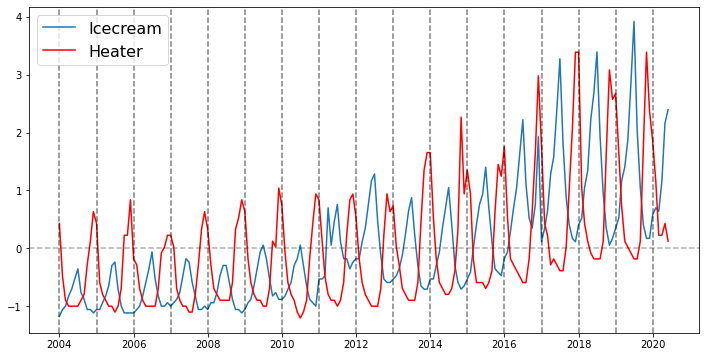

In [9]:
plt.figure(figsize=(12,6))
plt.plot(ice_cream_heater_df.icecream)
plt.plot(ice_cream_heater_df.heater,color='r')
for i in range(2004,2021):
    plt.axvline(pd.to_datetime(str(i)),linestyle='--',color='k',alpha=0.5)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)    
plt.legend(['Icecream','Heater'],fontsize=16)

### Take First Difference to Remove Trend¶

In [10]:
ice_cream_heater_df = (ice_cream_heater_df - ice_cream_heater_df.shift(1)).dropna()

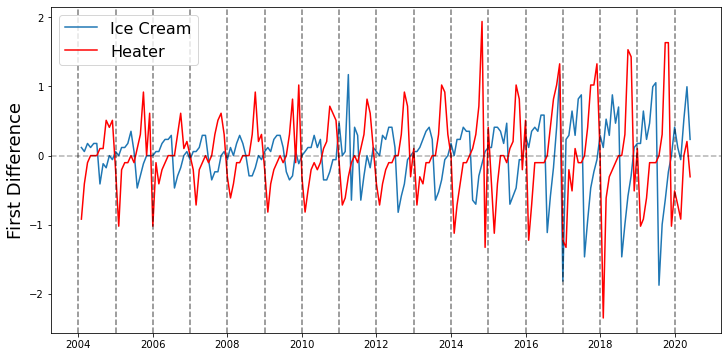

In [11]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['icecream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

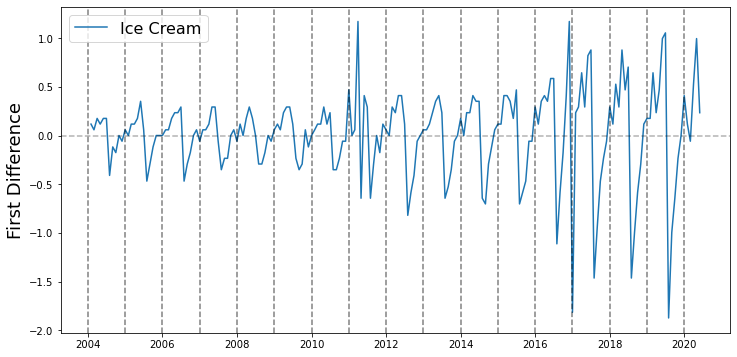

In [12]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['icecream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

### Remove Increasing volatility

In [13]:
annual_volatility = ice_cream_heater_df.groupby(by=ice_cream_heater_df.index.year).std()
annual_volatility

,heater,icecream
Month,,
2004,0.415481,0.184201
2005,0.474527,0.214837
2006,0.400148,0.227698
2007,0.359839,0.198947
2008,0.396182,0.183239
2009,0.499810,0.221038
2010,0.459566,0.211668
2011,0.443924,0.501018
2012,0.471104,0.389711


In [14]:
ice_cream_heater_df['ice_cream_annual_vol'] = ice_cream_heater_df.index.map(lambda d: annual_volatility.loc[d.year,'icecream'])
ice_cream_heater_df['heater_annual_vol'] = ice_cream_heater_df.index.map(lambda d: annual_volatility.loc[d.year,'heater'])
ice_cream_heater_df.head()

,heater,icecream,ice_cream_annual_vol,heater_annual_vol
Month,,,,
2004-02-01,-0.918789,0.11714,0.184201,0.415481
2004-03-01,-0.408351,0.05857,0.184201,0.415481
2004-04-01,-0.102088,0.17571,0.184201,0.415481
2004-05-01,0.000000,0.11714,0.184201,0.415481
2004-06-01,0.000000,0.17571,0.184201,0.415481


In [15]:
ice_cream_heater_df.icecream = ice_cream_heater_df.icecream / ice_cream_heater_df.ice_cream_annual_vol
ice_cream_heater_df.heater = ice_cream_heater_df.heater / ice_cream_heater_df.heater_annual_vol
ice_cream_heater_df.head()

,heater,icecream,ice_cream_annual_vol,heater_annual_vol
Month,,,,
2004-02-01,-2.211387,0.635934,0.184201,0.415481
2004-03-01,-0.982838,0.317967,0.184201,0.415481
2004-04-01,-0.245710,0.953901,0.184201,0.415481
2004-05-01,0.000000,0.635934,0.184201,0.415481
2004-06-01,0.000000,0.953901,0.184201,0.415481


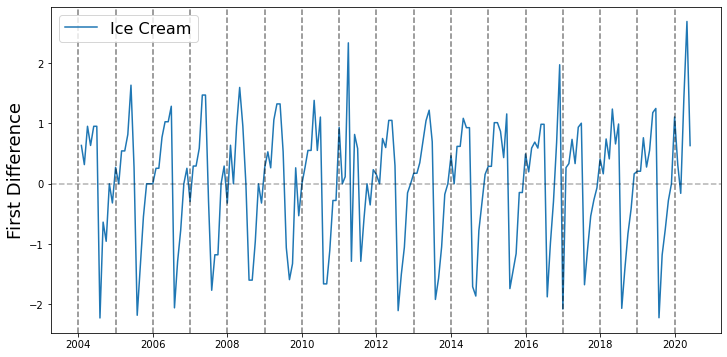

In [16]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['icecream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

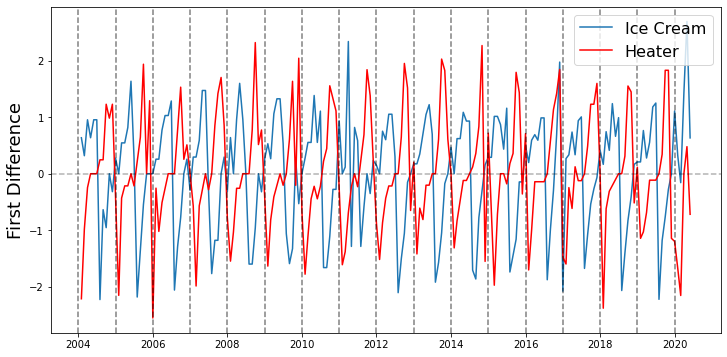

In [17]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['icecream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

## Remove Seasonality

In [18]:
month_avgs = ice_cream_heater_df.groupby(ice_cream_heater_df.index.month).mean()

In [19]:
month_avgs

,heater,icecream,ice_cream_annual_vol,heater_annual_vol
Month,,,,
1,-0.428360,0.130345,0.415976,0.580717
2,-1.483129,0.250194,0.402342,0.570997
3,-1.063595,0.433016,0.402342,0.570997
4,-0.442926,0.838085,0.402342,0.570997
5,-0.121663,0.967273,0.402342,0.570997
6,-0.128425,0.987311,0.402342,0.570997
7,-0.107093,0.735052,0.404376,0.580018
8,0.075720,-1.821285,0.404376,0.580018
9,0.544638,-1.307661,0.404376,0.580018


In [20]:
ice_cream_heater_df['ice_cream_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'icecream'])
ice_cream_heater_df['heater_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'heater'])

In [21]:
ice_cream_heater_df.head()

,heater,icecream,ice_cream_annual_vol,heater_annual_vol,ice_cream_month_avg,heater_month_avg
Month,,,,,,
2004-02-01,-2.211387,0.635934,0.184201,0.415481,0.250194,-1.483129
2004-03-01,-0.982838,0.317967,0.184201,0.415481,0.433016,-1.063595
2004-04-01,-0.245710,0.953901,0.184201,0.415481,0.838085,-0.442926
2004-05-01,0.000000,0.635934,0.184201,0.415481,0.967273,-0.121663
2004-06-01,0.000000,0.953901,0.184201,0.415481,0.987311,-0.128425


In [22]:
ice_cream_heater_df['icecream'] = ice_cream_heater_df['icecream'] - ice_cream_heater_df['ice_cream_month_avg']
ice_cream_heater_df['heater'] = ice_cream_heater_df['heater'] - ice_cream_heater_df['heater_month_avg']

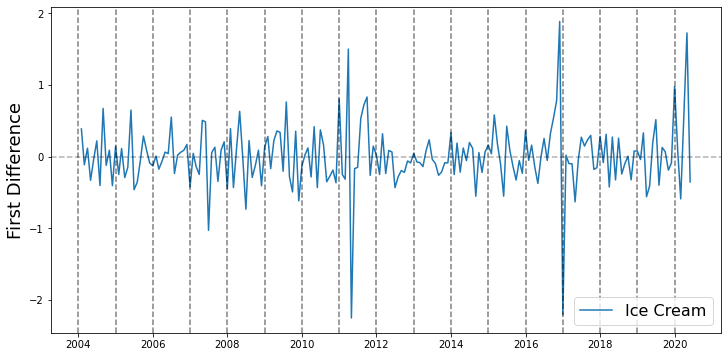

In [23]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['icecream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

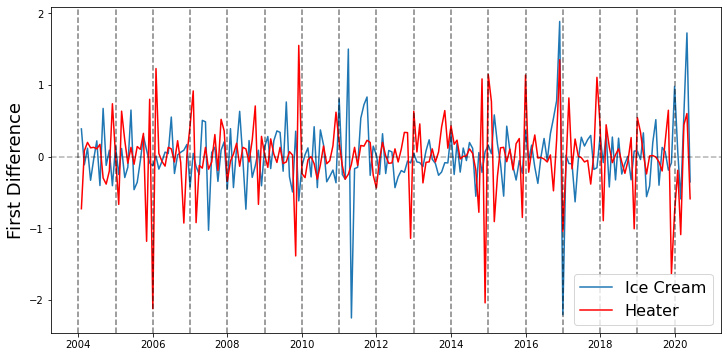

In [24]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['icecream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

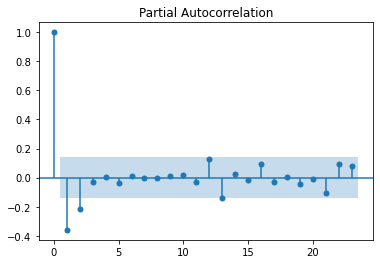

In [25]:
plot_pacf(ice_cream_heater_df['heater'])
plt.show()

### So consider an AR(2)

#### Correlation between "heater" and lagged "ice cream"

In [26]:
for lag in range(1, 20):
    heater_series = ice_cream_heater_df['heater'].iloc[lag:]
    lagged_ice_cream_series = ice_cream_heater_df['icecream'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(heater_series, lagged_ice_cream_series))
    print('------')

Lag: 1
(-0.03154450742591569, 0.660728499174997)
------
Lag: 2
(-0.09872703210944636, 0.1697084190508982)
------
Lag: 3
(-0.0017838553789235323, 0.9803056762962026)
------
Lag: 4
(0.06023971859825537, 0.4052979832528944)
------
Lag: 5
(-0.054034864480150276, 0.45664426275062703)
------
Lag: 6
(0.06461183026553832, 0.37453000434455314)
------
Lag: 7
(-0.04949334618415868, 0.49768766857621993)
------
Lag: 8
(0.07890837135977348, 0.2804548970433355)
------
Lag: 9
(-0.05323501699600426, 0.4681034202228288)
------
Lag: 10
(0.02953698906079119, 0.6882054906332707)
------
Lag: 11
(-0.059795363515225686, 0.41752174204858805)
------
Lag: 12
(-0.07513046035981785, 0.3094409252542959)
------
Lag: 13
(0.1980890219842975, 0.007029107082073426)
------
Lag: 14
(-0.132973640700672, 0.07273569107933278)
------
Lag: 15
(0.02320612068514237, 0.7558366928127561)
------
Lag: 16
(0.056192291601165664, 0.4524442767382636)
------
Lag: 17
(-0.013198156985760622, 0.860415006547994)
------
Lag: 18
(-0.0771398585

In [27]:
ice_cream_heater_df = ice_cream_heater_df[['icecream', 'heater']]

In [28]:
model = VAR(ice_cream_heater_df)

In [29]:
model_fit = model.fit(maxlags=13)

In [30]:
print(model_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 23, Nov, 2020
Time:                     21:17:57
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.92349
Nobs:                     184.000    HQIC:                  -2.48459
Log likelihood:          -204.405    FPE:                  0.0571123
AIC:                     -2.86700    Det(Omega_mle):       0.0434311
--------------------------------------------------------------------
Results for equation icecream
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.016054         0.034105           -0.471           0.638
L1.icecream         -0.287811         0.079633           -3.614           0.000
L1.heater           -0.121251         0.073673           -1.6

## So our final model is:

$$ \hat{h}_t = - 0.41h_{t-1} - 0.19h_{t-2} + 0.2i_{t-13} $$